# Generate Figure 1 (sample response matrix sorted by index weight)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils
import response_matrix
import viz

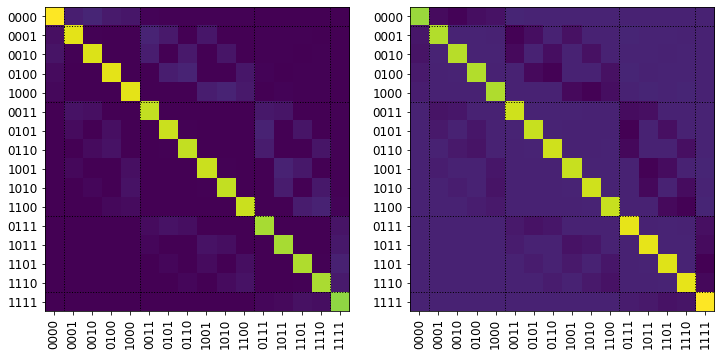

In [2]:
# Arrays of q(0|1) and q(1|0)
q01_arr = [0.06, .07, 0.1, 0.08]
q10_arr = [0.02, .03, .05, 0.04]
R = response_matrix.Rmatrix(q01_arr, q10_arr)
Rinv = np.linalg.inv(R)

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
idx_sort = viz.u_imshow(R, len(q01_arr), sort_by_weight=True, ax=axes[0])
idx_sort = viz.u_imshow(Rinv, len(q01_arr), sort_by_weight=True, ax=axes[1])
plt.savefig("R_Rinv_v0.pdf")

### Truncated, inverted R

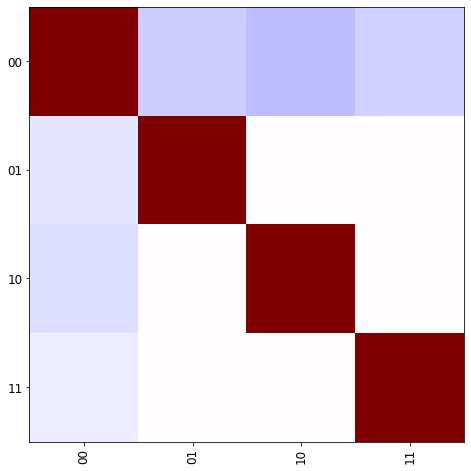

In [14]:
idx_sort = utils.idxsort_by_weight(3)
R_sorted = R[:,idx_sort][idx_sort,:]
trunc_inv_R = np.linalg.inv(R_sorted)[:4,:4]
_ = viz.u_imshow(trunc_inv_R, 2, sort_by_weight=False)

## Inverted truncated R

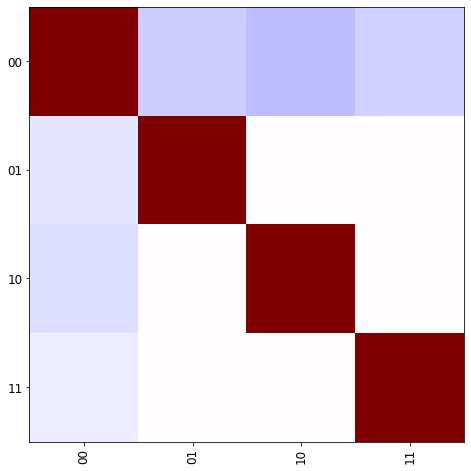

In [16]:
inv_trunc_R = np.linalg.inv(R_sorted[:4,:4])
idx_sort = viz.u_imshow(inv_trunc_R, 2, sort_by_weight=False)